## Machine Learning Project:
In today’s sharing economy, **Airbnb** has revolutionized the way people travel and accommodations. This analysis aims to uncover the complex dynamics behind Airbnb pricing in Berlin’s competitive market.
We’ll dive into the **Berlin Airbnb dataset** to answer key questions that matter to hosts, guests, and platform operators

**1.** Understand the drivers of Superhost status by analyzing how host responsiveness, experience, review history, ratings, and listing characteristics influence whether a host becomes a Superhost.

**2.** Develop predictive machine learning models to identify hosts who are likely to achieve Superhost status, enabling Airbnb to proactively target incentives and support programs.

**3.** Go beyond correlation to assess causality by evaluating whether specific host behaviors

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Loading Dataset

In [4]:
df = pd.read_csv(r"C:\Users\rgala\Desktop\ESMT Year II\ML production project\Airbnb Berlin.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\rgala\\Desktop\\ESMT Year II\\ML production project\\Airbnb Berlin.csv'

In [ ]:
df.head()

,index,Review ID,review_date,Reviewer ID,Reviewer Name,Comments,Listing ID,Listing URL,Listing Name,Host ID,...,Last Review,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Business Travel Ready
0,0,58660447.0,01-03-16,14876562.0,Dennis,"Very nice, clean appartement! Josh was really ...",10002699,https://www.airbnb.com/rooms/10002699,Trendy and peaceful KreuzkÃ¶lln,44696672,...,01-03-16,100.0,8.0,10.0,6.0,10.0,10.0,10.0,f,f
1,1,NaN,NaN,NaN,NaN,NaN,10002922,https://www.airbnb.com/rooms/10002922,Sehr zentrale Wohnung in Berlin,45848709,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f
2,2,58663795.0,01-03-16,49367757.0,Andreea,Aki is really nice and friendly. We had an ama...,10006647,https://www.airbnb.com/rooms/10006647,Very central and very quite,40791092,...,02-12-17,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f,f
3,3,59003619.0,01-05-16,46694292.0,Sasha,Aki is a very nice dude with a clean place in ...,10006647,https://www.airbnb.com/rooms/10006647,Very central and very quite,40791092,...,02-12-17,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f,f
4,4,66845661.0,03-25-16,54542819.0,Yohana,Aki's place was easy to find and located in th...,10006647,https://www.airbnb.com/rooms/10006647,Very central and very quite,40791092,...,02-12-17,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f,f


In [ ]:
# column names
df.columns


Index(['index', 'Review ID', 'review_date', 'Reviewer ID', 'Reviewer Name',
       'Comments', 'Listing ID', 'Listing URL', 'Listing Name', 'Host ID',
       'Host URL', 'Host Name', 'Host Since', 'Host Response Time',
       'Host Response Rate', 'Is Superhost', 'neighbourhood',
       'Neighborhood Group', 'City', 'Postal Code', 'Country Code', 'Country',
       'Latitude', 'Longitude', 'Is Exact Location', 'Property Type',
       'Room Type', 'Accomodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Square Feet', 'Price', 'Guests Included', 'Min Nights', 'Reviews',
       'First Review', 'Last Review', 'Overall Rating', 'Accuracy Rating',
       'Cleanliness Rating', 'Checkin Rating', 'Communication Rating',
       'Location Rating', 'Value Rating', 'Instant Bookable',
       'Business Travel Ready'],
      dtype='object')

In [ ]:
# missing values per column
df.isna().sum()


index                         0
Review ID                  4156
review_date                4156
Reviewer ID                4156
Reviewer Name              4156
Comments                   4366
Listing ID                    0
Listing URL                   0
Listing Name                205
Host ID                       0
Host URL                      0
Host Name                    48
Host Since                   48
Host Response Time        58767
Host Response Rate        58767
Is Superhost                 48
neighbourhood                 0
Neighborhood Group            0
City                         33
Postal Code                7703
Country Code                  0
Country                       0
Latitude                      0
Longitude                     0
Is Exact Location             0
Property Type                 0
Room Type                     0
Accomodates                   0
Bathrooms                   943
Bedrooms                    717
Beds                         90
Square F

### Handling Missing Data

In [ ]:
# rows before removal
rows_before = df.shape[0]

# remove rows with at least one missing value
df_clean = df.dropna()

# rows after removal
rows_after = df_clean.shape[0]

rows_before, rows_after


(456961, 26621)

## Data Preparation

**Lets get rid of columns which are not relevant**

Columns removed: 

* **index** – This is a technical row index created during data processing and does not contain any information useful for predicting Superhost status.
* **Review ID** – This column is only a unique identifier for reviews and carries no behavioral or performance-related information about the host.
* **Reviewer ID** – Reviewer identifiers do not describe host quality or actions and therefore add no predictive value.
* **Listing ID** – Listing identifiers are purely technical and can introduce noise without helping the model learn patterns.
* **Host ID** – Host identifiers uniquely label hosts but do not explain why a host becomes a Superhost.
* **Listing URL** – This is metadata used for navigation and has no analytical relevance.
* **Host URL** – This column contains only web links and does not capture host performance or behavior.
* **Reviewer Name** – Names are unstructured identifiers and do not contribute to understanding host quality.
* **Comments** – This is unstructured text data that requires separate NLP processing and is outside the scope of this model.
* **Country Code** – The dataset is limited to one country, making this column constant and uninformative.
* **Latitude** – Geographic coordinates add little value once neighborhood and city information are already included.
* **Longitude** – This is redundant location information and does not directly affect Superhost status.
* **Is Exact Location** – Whether the location is exact does not reflect host behavior or service quality.
* **review_date** – Review timing does not directly explain host performance once review counts and ratings are included.
* **Listing Name** – This is free-text information that does not reliably indicate host quality or responsiveness.
* **Host Name** – Host names act as identifiers and do not provide meaningful predictive information.





In [ ]:
drop_cols = [
    'index',
    'Review ID',
    'Reviewer ID',
    'Listing ID',
    'Host ID',
    'Listing URL',
    'Host URL',
    'Reviewer Name',
    'Comments',
    'Country Code',
    'Latitude',
    'Longitude',
    'Is Exact Location',
    'review_date',
    'Listing Name',
    'Host Name'
]

df_clean = df_clean.drop(columns=drop_cols)


In [ ]:
df_clean

,Host Since,Host Response Time,Host Response Rate,Is Superhost,neighbourhood,Neighborhood Group,City,Postal Code,Country,Property Type,...,Last Review,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Business Travel Ready
1118,03-11-13,a few days or more,0%,f,Friedrichshain,Friedrichshain-Kreuzberg,Berlin,10245.0,Germany,Apartment,...,01-02-19,96.0,10.0,9.0,10.0,10.0,10.0,10.0,f,f
1119,03-11-13,a few days or more,0%,f,Friedrichshain,Friedrichshain-Kreuzberg,Berlin,10245.0,Germany,Apartment,...,01-02-19,96.0,10.0,9.0,10.0,10.0,10.0,10.0,f,f
1120,03-11-13,a few days or more,0%,f,Friedrichshain,Friedrichshain-Kreuzberg,Berlin,10245.0,Germany,Apartment,...,01-02-19,96.0,10.0,9.0,10.0,10.0,10.0,10.0,f,f
1121,03-11-13,a few days or more,0%,f,Friedrichshain,Friedrichshain-Kreuzberg,Berlin,10245.0,Germany,Apartment,...,01-02-19,96.0,10.0,9.0,10.0,10.0,10.0,10.0,f,f
1122,03-11-13,a few days or more,0%,f,Friedrichshain,Friedrichshain-Kreuzberg,Berlin,10245.0,Germany,Apartment,...,01-02-19,96.0,10.0,9.0,10.0,10.0,10.0,10.0,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455326,03-12-13,within a few hours,100%,t,Charlottenburg,Charlottenburg-Wilm.,Berlin,10625.0,Germany,Apartment,...,12-15-18,93.0,9.0,9.0,9.0,10.0,10.0,9.0,t,f
455327,03-12-13,within a few hours,100%,t,Charlottenburg,Charlottenburg-Wilm.,Berlin,10625.0,Germany,Apartment,...,12-15-18,93.0,9.0,9.0,9.0,10.0,10.0,9.0,t,f
455328,03-12-13,within a few hours,100%,t,Charlottenburg,Charlottenburg-Wilm.,Berlin,10625.0,Germany,Apartment,...,12-15-18,93.0,9.0,9.0,9.0,10.0,10.0,9.0,t,f
455329,03-12-13,within a few hours,100%,t,Charlottenburg,Charlottenburg-Wilm.,Berlin,10625.0,Germany,Apartment,...,12-15-18,93.0,9.0,9.0,9.0,10.0,10.0,9.0,t,f


## Feature Engineering

In [ ]:
# see all unique values
df_clean['Host Response Time'].unique()


array(['a few days or more', 'within an hour', 'within a few hours',
       'within a day'], dtype=object)

In [ ]:
#Conversion of columns to make them ML ready
response_time_map = {
    'within an hour': 3,
    'within a few hours': 2,
    'within a day': 1,
    'a few days or more': 0
}

df_clean['host_response_time'] = (
    df_clean['Host Response Time'].map(response_time_map)
)

df_clean = df_clean.drop(columns=['Host Response Time'])


The **Host Response Time** column was converted from categorical text values into an ordinal numeric variable that reflects the natural ordering of response speed, with faster responses receiving higher scores. This transformation allows the model to correctly interpret quicker response times as better host behavior, which is a key criterion for achieving Superhost status.


In [ ]:
df_clean['host_since_year'] = pd.to_datetime(
    df_clean['Host Since'],
    format='%d-%m-%y',
    errors='coerce'
).dt.year
df_clean['host_tenure'] = 2026 - df_clean['host_since_year']
df_clean = df_clean.drop(columns=['Host Since', 'host_since_year'])


The **Host Since** column was transformed by extracting the year in which the host joined Airbnb, resulting in a new intermediate variable representing the host’s start year. Using this year, a new column called **host_tenure** was created by subtracting it from 2026, allowing the model to directly capture the number of years a host has been active, which is strongly related to trust and Superhost likelihood.


In [ ]:
df_clean


,Host Response Rate,Is Superhost,neighbourhood,Neighborhood Group,City,Postal Code,Country,Property Type,Room Type,Accomodates,...,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Business Travel Ready,host_response_time,host_tenure
1118,0%,f,Friedrichshain,Friedrichshain-Kreuzberg,Berlin,10245.0,Germany,Apartment,Private room,2,...,10.0,9.0,10.0,10.0,10.0,10.0,f,f,0,13.0
1119,0%,f,Friedrichshain,Friedrichshain-Kreuzberg,Berlin,10245.0,Germany,Apartment,Private room,2,...,10.0,9.0,10.0,10.0,10.0,10.0,f,f,0,13.0
1120,0%,f,Friedrichshain,Friedrichshain-Kreuzberg,Berlin,10245.0,Germany,Apartment,Private room,2,...,10.0,9.0,10.0,10.0,10.0,10.0,f,f,0,13.0
1121,0%,f,Friedrichshain,Friedrichshain-Kreuzberg,Berlin,10245.0,Germany,Apartment,Private room,2,...,10.0,9.0,10.0,10.0,10.0,10.0,f,f,0,13.0
1122,0%,f,Friedrichshain,Friedrichshain-Kreuzberg,Berlin,10245.0,Germany,Apartment,Private room,2,...,10.0,9.0,10.0,10.0,10.0,10.0,f,f,0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455326,100%,t,Charlottenburg,Charlottenburg-Wilm.,Berlin,10625.0,Germany,Apartment,Private room,1,...,9.0,9.0,9.0,10.0,10.0,9.0,t,f,2,13.0
455327,100%,t,Charlottenburg,Charlottenburg-Wilm.,Berlin,10625.0,Germany,Apartment,Private room,1,...,9.0,9.0,9.0,10.0,10.0,9.0,t,f,2,13.0
455328,100%,t,Charlottenburg,Charlottenburg-Wilm.,Berlin,10625.0,Germany,Apartment,Private room,1,...,9.0,9.0,9.0,10.0,10.0,9.0,t,f,2,13.0
455329,100%,t,Charlottenburg,Charlottenburg-Wilm.,Berlin,10625.0,Germany,Apartment,Private room,1,...,9.0,9.0,9.0,10.0,10.0,9.0,t,f,2,13.0


**Converting German Symbols to Normal english text**

In [ ]:
import unicodedata

def normalize_text(x):
    if isinstance(x, str):
        return unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8')
    return x

df_clean = df_clean.applymap(normalize_text)


C:\Users\rgala\AppData\Local\Temp\ipykernel_11048\1087028706.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(normalize_text)


In [ ]:
df_clean

,Host Response Rate,Is Superhost,neighbourhood,Neighborhood Group,City,Postal Code,Country,Property Type,Room Type,Accomodates,...,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Business Travel Ready,host_response_time,host_tenure
1118,0%,f,Friedrichshain,Friedrichshain-Kreuzberg,Berlin,10245.0,Germany,Apartment,Private room,2,...,10.0,9.0,10.0,10.0,10.0,10.0,f,f,0,13.0
1119,0%,f,Friedrichshain,Friedrichshain-Kreuzberg,Berlin,10245.0,Germany,Apartment,Private room,2,...,10.0,9.0,10.0,10.0,10.0,10.0,f,f,0,13.0
1120,0%,f,Friedrichshain,Friedrichshain-Kreuzberg,Berlin,10245.0,Germany,Apartment,Private room,2,...,10.0,9.0,10.0,10.0,10.0,10.0,f,f,0,13.0
1121,0%,f,Friedrichshain,Friedrichshain-Kreuzberg,Berlin,10245.0,Germany,Apartment,Private room,2,...,10.0,9.0,10.0,10.0,10.0,10.0,f,f,0,13.0
1122,0%,f,Friedrichshain,Friedrichshain-Kreuzberg,Berlin,10245.0,Germany,Apartment,Private room,2,...,10.0,9.0,10.0,10.0,10.0,10.0,f,f,0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455326,100%,t,Charlottenburg,Charlottenburg-Wilm.,Berlin,10625.0,Germany,Apartment,Private room,1,...,9.0,9.0,9.0,10.0,10.0,9.0,t,f,2,13.0
455327,100%,t,Charlottenburg,Charlottenburg-Wilm.,Berlin,10625.0,Germany,Apartment,Private room,1,...,9.0,9.0,9.0,10.0,10.0,9.0,t,f,2,13.0
455328,100%,t,Charlottenburg,Charlottenburg-Wilm.,Berlin,10625.0,Germany,Apartment,Private room,1,...,9.0,9.0,9.0,10.0,10.0,9.0,t,f,2,13.0
455329,100%,t,Charlottenburg,Charlottenburg-Wilm.,Berlin,10625.0,Germany,Apartment,Private room,1,...,9.0,9.0,9.0,10.0,10.0,9.0,t,f,2,13.0


**Lets create some variables**

**Average Overall Rating**

In [ ]:
rating_cols = [
    'Accuracy Rating', 'Cleanliness Rating', 'Checkin Rating',
    'Communication Rating', 'Location Rating', 'Value Rating'
]

df_clean['avg_rating'] = df_clean[rating_cols].mean(axis=1)


**Ratings Consistency**

In [ ]:
df_clean['rating_consistency'] = df_clean[rating_cols].std(axis=1)


In [ ]:
df_clean

,Host Response Rate,Is Superhost,neighbourhood,Neighborhood Group,City,Postal Code,Country,Property Type,Room Type,Accomodates,...,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Business Travel Ready,host_response_time,host_tenure,avg_rating,rating_consistency
1118,0%,f,Friedrichshain,Friedrichshain-Kreuzberg,Berlin,10245.0,Germany,Apartment,Private room,2,...,10.0,10.0,10.0,10.0,f,f,0,13.0,9.833333,0.408248
1119,0%,f,Friedrichshain,Friedrichshain-Kreuzberg,Berlin,10245.0,Germany,Apartment,Private room,2,...,10.0,10.0,10.0,10.0,f,f,0,13.0,9.833333,0.408248
1120,0%,f,Friedrichshain,Friedrichshain-Kreuzberg,Berlin,10245.0,Germany,Apartment,Private room,2,...,10.0,10.0,10.0,10.0,f,f,0,13.0,9.833333,0.408248
1121,0%,f,Friedrichshain,Friedrichshain-Kreuzberg,Berlin,10245.0,Germany,Apartment,Private room,2,...,10.0,10.0,10.0,10.0,f,f,0,13.0,9.833333,0.408248
1122,0%,f,Friedrichshain,Friedrichshain-Kreuzberg,Berlin,10245.0,Germany,Apartment,Private room,2,...,10.0,10.0,10.0,10.0,f,f,0,13.0,9.833333,0.408248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455326,100%,t,Charlottenburg,Charlottenburg-Wilm.,Berlin,10625.0,Germany,Apartment,Private room,1,...,9.0,10.0,10.0,9.0,t,f,2,13.0,9.333333,0.516398
455327,100%,t,Charlottenburg,Charlottenburg-Wilm.,Berlin,10625.0,Germany,Apartment,Private room,1,...,9.0,10.0,10.0,9.0,t,f,2,13.0,9.333333,0.516398
455328,100%,t,Charlottenburg,Charlottenburg-Wilm.,Berlin,10625.0,Germany,Apartment,Private room,1,...,9.0,10.0,10.0,9.0,t,f,2,13.0,9.333333,0.516398
455329,100%,t,Charlottenburg,Charlottenburg-Wilm.,Berlin,10625.0,Germany,Apartment,Private room,1,...,9.0,10.0,10.0,9.0,t,f,2,13.0,9.333333,0.516398


##### **Outlier Removal**: 
We’re filtering out listings with extremely high prices (above the 99th percentile) as these
outliers could distort our analysis and model performance

In [ ]:

# convert Price to numeric
df_clean['Price'] = (
    df_clean['Price']
    .astype(str)
    .str.replace(r'[^0-9.]', '', regex=True)
    .astype(float)
)

# calculate 99th percentile
price_99 = df_clean['Price'].quantile(0.99)

# remove extreme high-price listings
df_clean = df_clean[df_clean['Price'] <= price_99]



### EDA

In [ ]:
avg_price_nb = (
    df_clean.groupby('neighbourhood')['Price']
    .mean()
    .sort_values(ascending=False)
    .head(20)
    .reset_index()
)

# reverse palette so left (highest) is darkest
pink_palette = sns.light_palette(
    "deeppink",
    n_colors=len(avg_price_nb),
    reverse=True
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=avg_price_nb,
    x='neighbourhood',
    y='Price',
    palette=pink_palette
)

plt.xticks(rotation=90)
plt.title('Average Price by Neighbourhood (Top 20)')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()



NameError: name 'df_clean' is not defined

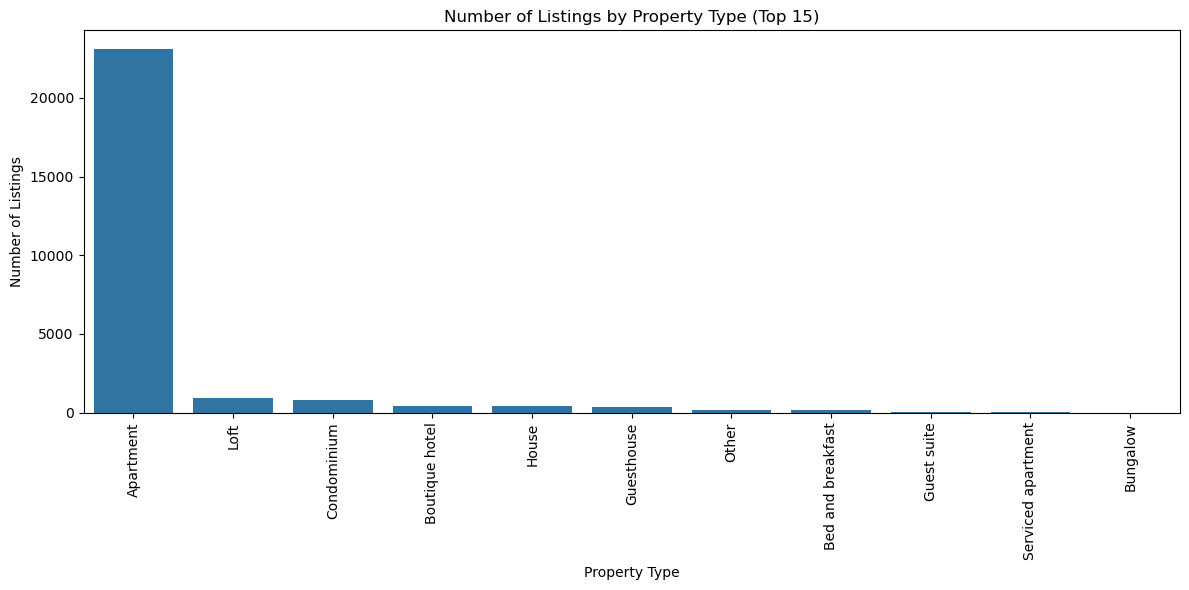

In [ ]:
type_counts = (
    df_clean['Property Type']
    .value_counts()
    .head(15)
    .reset_index()
)

type_counts.columns = ['Property Type', 'Count']

plt.figure(figsize=(12,6))
sns.barplot(data=type_counts, x='Property Type', y='Count')
plt.xticks(rotation=90)
plt.title('Number of Listings by Property Type (Top 15)')
plt.xlabel('Property Type')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()


C:\Users\rgala\AppData\Local\Temp\ipykernel_11048\1851505177.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


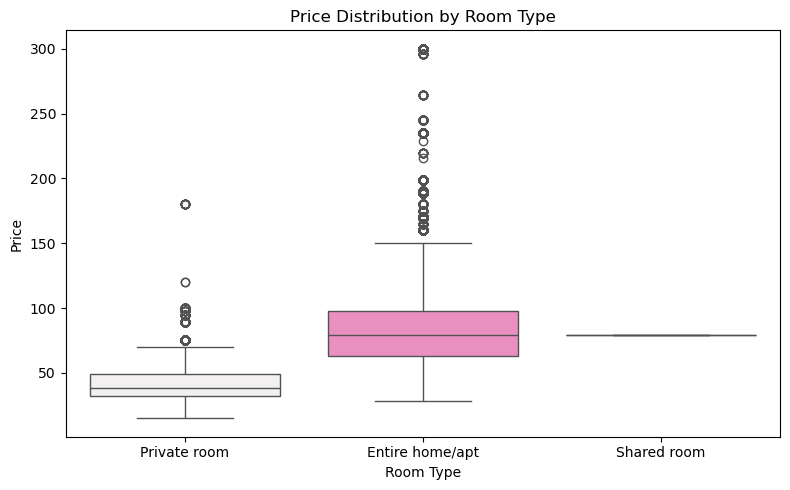

In [ ]:
pink_palette = sns.light_palette(
    "deeppink",
    n_colors=df_clean['Room Type'].nunique(),
    reverse=False
)

plt.figure(figsize=(8,5))
sns.boxplot(
    data=df_clean,
    x='Room Type',
    y='Price',
    palette=pink_palette
)

plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.tight_layout()
plt.show()




### Train-Test Split

In [ ]:
# Define the target variable and features
target = 'Is Superhost'
X = df.drop(columns=[target])
y = df[target]

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")